In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
data_dir = "C:\\Users\\dongh\\Downloads\\MBD project\\"

In [33]:
listc = ["Time","Alberta","British Columbia","Manitoba","Nova Scotia","Ontario","Quebec"]
lista = ["California","Colorado","Florida","Georgia","Hawaii","Illinois","Massachusetts"
         ,"Michigan","North Carolina","New Jersey","Nevada","New York","Texas","Virginia","Washington"]

In [34]:
us = pd.read_csv(data_dir + "US-bystate.csv")
us.columns.values[0] = "Index"
us = us.set_index("Index")
us = us.transpose()
us = us.reset_index()
Others = pd.read_csv(data_dir + "Others.csv")
impact = pd.read_csv(data_dir + "irport_traffic.csv")
canada = Others.loc[:,listc]

In [35]:
list = us.columns.values
list[0] = "Time"
us.columns = list
us.head()

,Time,New York,California,Florida,Hawaii,Nevada,Massachusetts,Texas,Illinois,New Jersey,Washington,Georgia,Virginia,Colorado,North Carolina,Michigan
0,1/23/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1/24/2020,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1/25/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1/26/2020,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1/27/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
canada.head()

,Time,Alberta,British Columbia,Manitoba,Nova Scotia,Ontario,Quebec
0,1/23/2020,0,0,0,0,0,0
1,1/24/2020,0,0,0,0,0,0
2,1/25/2020,0,0,0,0,0,0
3,1/26/2020,0,0,0,0,1,0
4,1/27/2020,0,0,0,0,0,0


In [37]:
impact.head()

,Date,PercentOfBaseline,State
0,3/16/2020,92,New South Wales
1,3/16/2020,96,Santiago Province
2,3/16/2020,100,Alberta
3,3/16/2020,63,Alberta
4,3/16/2020,100,British Columbia


In [38]:
cali_inf = us.loc[:,["Time","Florida"]]
cali_inf = cali_inf.reset_index()
cali_inf = cali_inf.drop("index",axis=1)
cali_inf.head()

,Time,Florida
0,1/23/2020,0
1,1/24/2020,0
2,1/25/2020,0
3,1/26/2020,0
4,1/27/2020,0


In [39]:
cali_imp = impact.loc[impact.State == "Florida",:]
cali_imp = cali_imp.reset_index()
cali_imp = cali_imp.drop("index",axis=1)
cali_imp.head()

,Date,PercentOfBaseline,State
0,3/16/2020,98,Florida
1,3/17/2020,90,Florida
2,3/18/2020,82,Florida
3,3/19/2020,75,Florida
4,3/20/2020,80,Florida


In [40]:
index1 = cali_inf["Time"].values.tolist()
index1 = index1.index("3/16/2020")
index2 = cali_inf["Time"].values.tolist()
index2 = index2.index("10/17/2020")
cali_inf = cali_inf.iloc[index1:index2,:]
cali_inf.shape

(215, 2)

In [41]:
cali_imp = cali_imp.drop("State",axis=1)
cali_imp.head()

,Date,PercentOfBaseline
0,3/16/2020,98
1,3/17/2020,90
2,3/18/2020,82
3,3/19/2020,75
4,3/20/2020,80


In [42]:
cali_imp = cali_imp.groupby("Date").mean()
cali_imp = cali_imp.reset_index()
cali_imp

,Date,PercentOfBaseline
0,10/1/2020,59
1,10/10/2020,53
2,10/11/2020,54
3,10/12/2020,83
4,10/13/2020,74
...,...,...
209,9/5/2020,49
210,9/6/2020,62
211,9/7/2020,31
212,9/8/2020,70


In [43]:
cali_inf.to_csv(r"C:\\Users\\dongh\\Downloads\\MBD project\\florida_inf.csv", index=False, header=True)
cali_imp.to_csv(r"C:\\Users\\dongh\\Downloads\\MBD project\\florida_imp.csv", index=False, header=True)

In [115]:
cali = pd.read_csv(data_dir + "florida.csv")
cali.head()

,Time,Florida,PercentOfBaseline
0,3/16/2020,1,98.0
1,3/17/2020,89,90.0
2,3/18/2020,116,82.0
3,3/19/2020,126,75.0
4,3/20/2020,132,80.0


In [116]:
N = 5
cali = cali.groupby(cali.index // N).mean()

In [117]:
cali = cali.reset_index()
cali["change"] = 0
for i in range(len(cali)):
    if i == 0:
        continue
    else:
        cali.iloc[i,3] = (cali.iloc[i,1] - cali.iloc[i-1,1])/cali.iloc[i-1,1]

In [118]:
cali = cali.iloc[1:,:]
cali.head()

,index,Florida,PercentOfBaseline,change
1,1,223.6,66.0,1.409483
2,2,758.2,61.4,2.390877
3,3,1212.8,63.6,0.599578
4,4,965.4,60.4,-0.203991
5,5,1052.8,53.8,0.090532


In [119]:
N = 2
tmp1 = pd.DataFrame(cali.PercentOfBaseline[:20])
tmp1["change"] = cali.iloc[(N):(20+N),3].tolist()

In [120]:
cali = tmp1[:]
cali.head()

,PercentOfBaseline,change
1,66.0,0.599578
2,61.4,-0.203991
3,63.6,0.090532
4,60.4,-0.109802
5,53.8,-0.099659


In [121]:
#cali.to_csv(r"C:/Users/10331/OneDrive/Desktop/cali.csv", index=False, header=True)

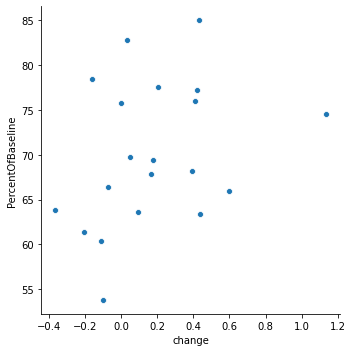

In [122]:
sns.relplot("change","PercentOfBaseline",data = tmp1)

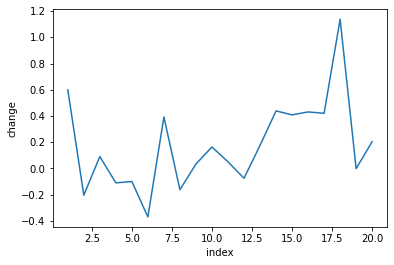

In [123]:
cali = cali.reset_index()
sns.lineplot("index","change",data = cali)

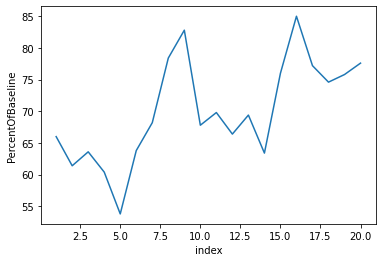

In [124]:
sns.lineplot("index","PercentOfBaseline",data = cali)

In [125]:
from statsmodels.api import OLS
OLS(cali.change,cali.PercentOfBaseline).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 change   R-squared (uncentered):                   0.245
Model:                            OLS   Adj. R-squared (uncentered):              0.205
Method:                 Least Squares   F-statistic:                              6.163
Date:                Sun, 22 Nov 2020   Prob (F-statistic):                      0.0226
Time:                        01:00:36   Log-Likelihood:                         -6.1647
No. Observations:                  20   AIC:                                      14.33
Df Residuals:                      19   BIC:                                      15.33
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
PercentOfBaseline     0.0027      0.001      2.483      0.023       0.000       0.005
==============================================================================
Omnibus:                        7.031   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                4.440
Skew:                           0.984   Prob(JB):                        0.109
Kurtosis:                       4.207   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""